In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('df.csv')
df.head()

,Unnamed: 0,type_of_nucleic_acid,aptamer_sequence,sequence_length,gc_content,kd_(nm),type_of_the_buffer,ph,filtered_sequence,mol_wt,num_rotatable_bonds,tpsa,mol_log_p
0,1,12,GAAUUGUGGUGUUGGCUCCCUAUAGUGAGUCGUAUUAAUAUUCCUU...,113,0.336283,4.8,0,7.466744,MKEFYISIETVGNNIVERYIDENGKERTREVEYLPTMFRHCKEESK...,134278.328,714.0,54936.71,-838.74460
1,2,12,GAAUUGUGGUGUUGGCUCCCUAUAGUGAGUCGUAUUAAUAUUCCUU...,113,0.353982,4.8,0,7.466744,MKEFYISIETVGNNIVERYIDENGKERTREVEYLPTMFRHCKEESK...,34932.516,713.0,14449.86,-254.95599
2,3,11,GGTTGGTGTGGTTGG,15,0.600000,112.5,3,7.400000,TSEDHFQPFFNEKTFGAGEADCGLRPLFEKKQVQDQTEKELFESYI...,73107.795,730.0,30882.71,-636.91317
3,4,11,GGTTGG,6,0.666667,112.5,3,7.400000,TSEDHFQPFFNEKTFGAGEADCGLRPLFEKKQVQDQTEKELFESYI...,69525.328,704.0,28032.07,-543.13314
4,5,12,GGGAGCAUCAGACUUUUAAUCUGACAAUCAAGAAUUCCGUUUUCAG...,96,0.333333,5.0,3,7.700000,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,74526.975,726.0,30647.61,-663.15408


In [3]:
df['mol_wt'].unique()

array([134278.328     ,  34932.516     ,  73107.795     ,  69525.328     ,
        74526.975     ,  11052.178     ,  44940.539     ,  19938.066     ,
        47166.533     ,  42273.264     , 109735.536     ,  69457.366     ,
       163280.03100001,  57511.675     ,   7725.818     ,  62547.704     ,
        56528.333     ,  42813.299     ,  38248.939     ,  97170.731     ,
        20608.113     ,  88885.085     ,  38238.927     ,  52682.49      ,
        20713.165     ,  35149.246     ,   9769.343     ,  57100.996     ,
        44851.924     ,  68407.309     ,             nan,  17279.952     ,
       103610.335     , 162042.68200001,   1070.299     ,  16028.531     ,
        47777.632     ,  76751.307     ,  35609.101     ,  23501.421     ,
        28450.903     ,  23614.036     ,  32329.98      ,  47065.86      ,
        13714.625     ,  22086.628     ,  30640.235     ,  87028.584     ,
        38177.801     , 133995.162     ,  49591.304     ,  45060.233     ,
        64368.209     ,  

В колонке присутвует nan, удалим такие колонки.

In [4]:
df.dropna(subset=['mol_wt'], inplace=True)
df.dropna(subset=['num_rotatable_bonds'], inplace=True)
df.dropna(subset=['tpsa'], inplace=True)
df.dropna(subset=['mol_log_p'], inplace=True)

## Регресионное моделирование

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 649
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            641 non-null    int64  
 1   type_of_nucleic_acid  641 non-null    int64  
 2   aptamer_sequence      641 non-null    object 
 3   sequence_length       641 non-null    int64  
 4   gc_content            641 non-null    float64
 5   kd_(nm)               641 non-null    float64
 6   type_of_the_buffer    641 non-null    int64  
 7   ph                    641 non-null    float64
 8   filtered_sequence     641 non-null    object 
 9   mol_wt                641 non-null    float64
 10  num_rotatable_bonds   641 non-null    float64
 11  tpsa                  641 non-null    float64
 12  mol_log_p             641 non-null    float64
dtypes: float64(7), int64(4), object(2)
memory usage: 70.1+ KB


In [12]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


X = df.drop({'aptamer_sequence', 'filtered_sequence', 'kd_(nm)'}, axis=1)
y = df['kd_(nm)']

# Масштабирование числовых признаков
scaler = MinMaxScaler()
X[['gc_content', 'ph', 'mol_wt', 'num_rotatable_bonds', 'tpsa', 'mol_log_p']] = scaler.fit_transform(X[[
    'gc_content', 'ph', 'mol_wt', 'num_rotatable_bonds', 'tpsa', 'mol_log_p'
    ]])

# X = scaler.fit_transform(X)


# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [46]:
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def print_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'MSE: {mse}, R^2: {r2}, MAE: {mae}, RMSE: {rmse}')



In [47]:
print_metrics(y_test, y_pred)

MSE: 7673.522641554313, R^2: -0.028124384884131937, MAE: 58.57168624788002, RMSE: 87.59864520387465


In [36]:
from sklearn.dummy import DummyClassifier 

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# Делаем предсказания на тестовом наборе
y_pred_dummy = dummy_clf.predict(X_test)

In [37]:
print_metrics(y_test, y_pred_dummy)

MSE: 9330.694825183937, R^2: -0.25015789042366743, MAE: 50.32010880829015, RMSE: 96.59552176567989


In [39]:
def scatter(col1, col2):
    plt.scatter(df[col1], df[col2], )
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 649
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type_of_nucleic_acid  641 non-null    int64  
 1   aptamer_sequence      641 non-null    object 
 2   sequence_length       641 non-null    int64  
 3   gc_content            641 non-null    float64
 4   kd_(nm)               641 non-null    float64
 5   type_of_the_buffer    641 non-null    int64  
 6   ph                    641 non-null    float64
 7   filtered_sequence     641 non-null    object 
 8   mol_wt                641 non-null    float64
 9   num_rotatable_bonds   641 non-null    float64
 10  tpsa                  641 non-null    float64
 11  mol_log_p             641 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 81.3+ KB


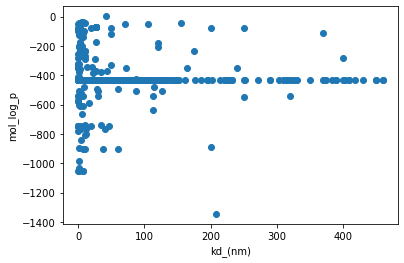

In [44]:
scatter('kd_(nm)', 'mol_log_p')